# Project Description

As an analyst at a big online store. Together with the marketing department, we will compile a list of hypotheses that may help boost revenue.
We will be prioritizing these hypotheses, launch an A/B test, and analyze the results.
Description of the data:<br>
- Hypotheses<br>
 - Hypotheses — brief descriptions of the hypotheses
 - Reach — user reach, on a scale of one to ten
 - Impact — impact on users, on a scale of one to ten
 - Confidence — confidence in the hypothesis, on a scale of one to ten
 - Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.
- Orders
 - transactionId — order identifier
 - visitorId — identifier of the user who placed the order
 - date — of the order
 - revenue — from the order
 - group — the A/B test group that the user belongs to
- Visits
 - date — date
 - group — A/B test group
 - visits — the number of visits on the date specified in the A/B test group specified

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import sys
sys.setrecursionlimit(10**6)
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from functools import reduce
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('/datasets/visits_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
pd.set_option('max_colwidth', 400)
#Studying the general information 
print('\n\nVisits:')
display(visits.describe())
display(visits.head())
print('\n Number of duplicated rows in visits dataframe:',visits.duplicated().sum())
print()
print(visits.info())
print('\nSkewness')
print(visits.skew())  
print('\n\nNull Values:')
print(visits.isnull().sum()*100/len(visits))

print('\n\nOrders:')
display(orders.describe())
display(orders.head())
print('\n Number of duplicated rows in orders dataframe:',orders.duplicated().sum())
print()
print(orders.info())
print('\nSkewness')
print(orders.skew())
print('\n\nNull Values:')
print(orders.isnull().sum()*100/len(orders))

print('\n\Hypotheses:')
display(hypotheses.describe())
display(hypotheses)
print('\n Number of duplicated rows in hypotheses dataframe:',hypotheses.duplicated().sum())
print()
print(hypotheses.info())
print('\nSkewness')
print(hypotheses.skew())
print('\n\nNull Values:')
hypotheses.isnull().sum()*100/len(hypotheses)




Visits:


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



 Number of duplicated rows in visits dataframe: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Skewness
visits   -0.604418
dtype: float64


Null Values:
date      0.0
group     0.0
visits    0.0
dtype: float64


Orders:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



 Number of duplicated rows in orders dataframe: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

Skewness
transactionId    -0.006855
visitorId        -0.021104
revenue          29.772350
dtype: float64


Null Values:
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

\Hypotheses:


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5



 Number of duplicated rows in hypotheses dataframe: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Skewness
Reach         0.600307
Impact        0.673820
Confidence   -0.410873
Effort        0.626906
dtype: float64


Null Values:


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Effort        0.0
dtype: float64

<h4>Conclusion

- We notice that the column names for hypotheses dataframe have spaces and capital letters, so we will be replacing them with underscore and small letters respectively.
- Also all the dates are non-object datatypes, we will change them to datetime
- Finally we also checked for null and duplicate values in all three dataframes and found that there were none

In [3]:
#changing the column names to be consistent 
hypotheses.columns = hypotheses.columns.str.lower()
orders.columns = orders.columns.str.lower()

#Changing the date columns datatype to datetime
visits['date'] =  pd.to_datetime(visits['date'],dayfirst = True)
orders['date'] =  pd.to_datetime(orders['date'],dayfirst = True)


visits.info()
#orders.info()
hypotheses.info()

#Filtering data with only users assigned to 1 group
orders_list = orders.groupby(['visitorid'])['group'].nunique().reset_index().query('group==1')        
clean_orders = orders.merge(orders_list['visitorid'], on = 'visitorid', how = 'right')
print(clean_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
None


<h4>Conclusion

- We can see that there were some visitors who were in both groups A and B. We are dropping the users that got into 2 groups or 2 tests. We can't know for sure what they saw and what influenced their behavior, thus removed them so that we can have much more clearer results.

# Part 1. Prioritizing Hypotheses

<h3>Apply the ICE framework to prioritize hypotheses.

In [4]:
hypotheses['ICE'] = (hypotheses.impact * hypotheses.confidence) /  hypotheses.effort

display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


<h3>Apply the RICE framework to prioritize hypotheses.

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


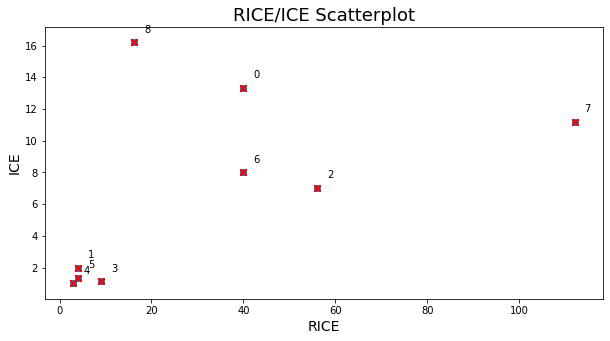

In [5]:
hypotheses['RICE'] = (hypotheses.impact * hypotheses.confidence * hypotheses.reach) /  hypotheses.effort

display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))


# plotting a RICE/ICE scatterplot
x = hypotheses['RICE'].values
y = hypotheses['ICE'].values
types = hypotheses.reset_index().index.values

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)

ax.set_xlabel('RICE', fontsize=14)
ax.set_ylabel('ICE', fontsize=14)
ax.set_title('RICE/ICE Scatterplot', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

<h4>Conclusion

8>0>7>6>2 is the order while calculating the most promising `hypothesis` with ICE framework and its the same for RICE framework but the order is different, for RICE it is 7>2>0>6>8 because `hypothesis` 7 has a reach of 10. Apart from how strong the `hypothesis` is we need to consider how many users it will effect.

# Part 2. A/B Test Analysis

- We'll build an array with unique paired date-group values using the drop_duplicates() method. 
- Then we get the rows of the orders table where the date is less than or equal to the date of the datesGroups element and the test group is the same as in datesGroups
- Next we aggregate the values. We find the maximum date. We'll find the maximum value for the group, too, so that we have the 'group' column in our final output. We find the number of unique order and user IDs and calculate the sum of average purchase sizes

In [24]:



# building an array with unique paired date-group values
datesGroups = clean_orders[['date','group']].drop_duplicates() 

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(
    lambda x: clean_orders[
        np.logical_and(
            clean_orders['date'] <= x['date'], clean_orders['group'] == x['group']
        )
    ].agg(
        {
'date' : 'max',
'group' : 'max',
'transactionid' : 'nunique',
'visitorid' : 'nunique',
'revenue' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg(
        {
    'date' : 'max',
    'group' : 'max',
    'visits' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

display(cumulativeData.head(5)) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
None
   transactionid   visitorid       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


<h3>Graph cumulative revenue by group.

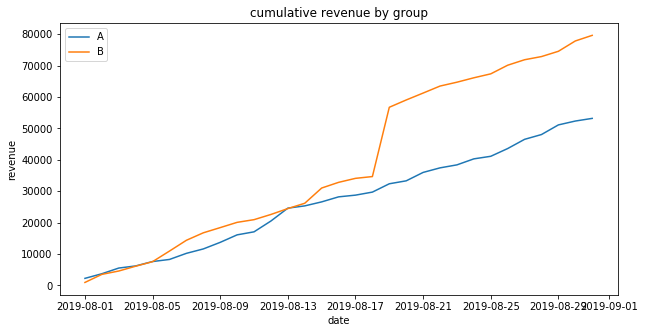

,date,revenue,orders,buyers
0,2019-08-01,2266.6,23,19
2,2019-08-02,3734.9,42,36
4,2019-08-03,5550.1,66,60
6,2019-08-04,6225.6,77,71
8,2019-08-05,7623.6,99,92
10,2019-08-06,8292.0,114,104
12,2019-08-07,10234.0,130,120
14,2019-08-08,11638.8,144,133
16,2019-08-09,13734.0,155,143
18,2019-08-10,16121.5,170,158


In [7]:

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders','buyers']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','buyers']]

# Plotting the group A revenue graph 
plt.figure(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('cumulative revenue by group')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()
cumulativeRevenueA

<h4>Conclusion

- Revenue is rising almost steadily throughout the whole test. That's a good sign.
- However, we can see that both groups see spikes in revenue at certain points, mostly group B. 
- This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.
- Segment B took a lead from the second date and held onto it, looks like big orders are affective

<h3>Graph cumulative average order size by group. 

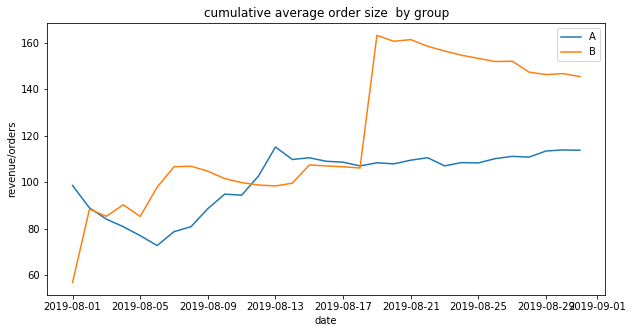

In [8]:
plt.figure(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('revenue/orders')
plt.title('cumulative average order size  by group')
plt.plot(
    cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A'
)
plt.plot(
    cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B'
)
plt.legend() 
plt.show()

<h4>Conclusion

- Average order size becomes steady by the end of the test, too: it stabilizes for group A and but still keeps on falling slowly for group B. 
- The surge in group B in the second half of the test may have been due to the presence of large, expensive orders.

<h3>Graph the relative difference in cumulative average order size for group B compared with group A

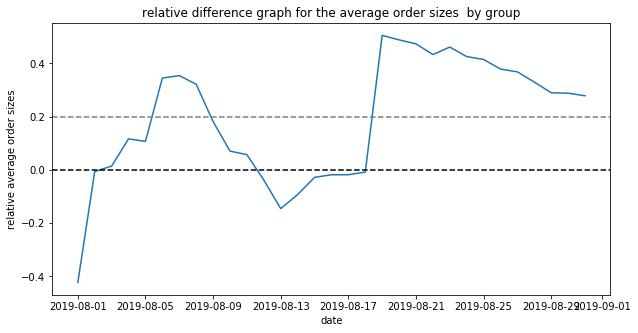

In [9]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# plotting a relative difference graph for the average order sizes
plt.figure(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('relative average order sizes')
plt.title('relative difference graph for the average order sizes  by group')
plt.plot(
    mergedCumulativeRevenue['date'], (
        mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
    )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

<h4>Conclusion

- At several points the difference between the segments spikes. This means there must be some big orders and outliers! 
- Only towards the end we see some kind of stability
- Group B was the leader in average order size almost from the beginning, it reached a high of 40% but it still has not stabilized yet.

<h3>Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.

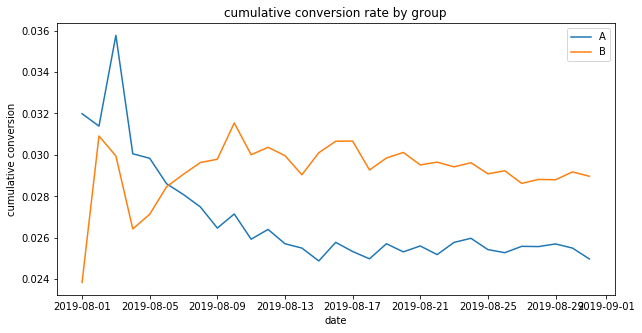

In [10]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('cumulative conversion')
plt.title('cumulative conversion rate by group')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()



<h4>Conclusion

- We got a symmetrical graph. The groups were fluctuating around the same value, but then the conversion rate of group B rose before stabilizing, while the conversion rate of group A dropped but then stabilized, too.
- At the beginning of the test, group A was lagging behind noticeably, but then it suddenly took the lead. Then its conversion fell again.
- In general, the conversion ratio is stable.

<h3>Plot a scatter chart of the number of orders per user.

,userid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


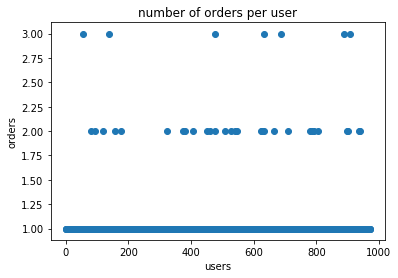

In [11]:
ordersByUsers = (
    clean_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['userid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


x_values = pd.Series(range(0,len(ordersByUsers)))
plt.xlabel('users')
plt.ylabel('orders')
plt.title('number of orders per user')
plt.scatter(x_values, ordersByUsers['orders'])  
plt.show()



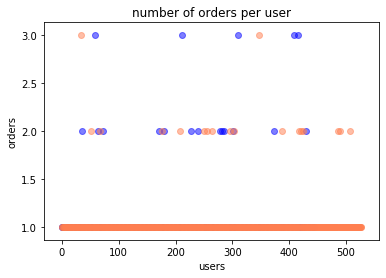

In [12]:
ordersByUsersA1 = clean_orders[clean_orders['group']=='A'].groupby(['visitorid','group'], as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA1.columns = ['userId','group','orders']

ordersByUsersB1 = clean_orders[clean_orders['group']=='B'].groupby(['visitorid','group'], as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB1.columns = ['userId','group', 'orders']

x_values = pd.Series(range(0,len(ordersByUsersA1)))
plt.xlabel('users')
plt.ylabel('orders')
plt.title('number of orders per user')
plt.scatter(x_values, ordersByUsersA1['orders'],c='blue',alpha = 0.5) 
x_values = pd.Series(range(0,len(ordersByUsersB1)))
plt.scatter(x_values, ordersByUsersB1['orders'],c='coral',alpha = 0.5) 
plt.show()



<h4>Conclusion

- Our conclusions are confirmed: there are indeed a lot of users with two to three orders. 
- The exact share remains unknown, since it's not clear whether we should consider whcih of them to be anomalies or not.
- Most of the users have one order each

<h3>Calculate the 95th and 99th percentiles for the number of orders per user. 

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


<h4>Conclusion

Not more than 5% of users placed more than 1  orders, and 1% of users made more than 2.
We can set the abnormal limit to be those which are more than 1.

<h3>Plot a scatter chart of order prices.

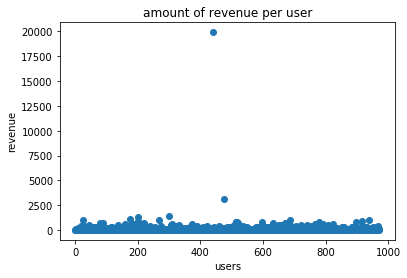

In [14]:
ordersByPrice = (
    clean_orders.drop(['group', 'transactionid', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'revenue': 'sum'})
)

ordersByPrice.columns = ['userid', 'revenue']
x_values = pd.Series(range(0,len(ordersByPrice)))
plt.xlabel('users')
plt.ylabel('revenue')
plt.title('amount of revenue per user')

plt.scatter(x_values, ordersByPrice['revenue']) 
plt.show()


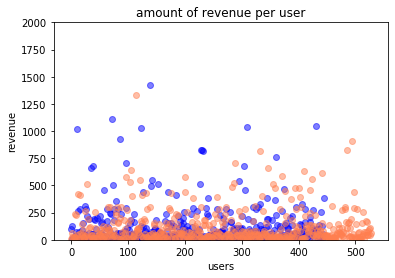

In [15]:
ordersByPriceA1 = clean_orders[clean_orders['group']=='A'].groupby(['visitorid','group'], as_index=False).agg({'revenue' : 'sum'})
ordersByPriceA1.columns = ['userId','group','revenue']

ordersByPriceB1 = clean_orders[clean_orders['group']=='B'].groupby(['visitorid','group'], as_index=False).agg({'revenue' : 'sum'})
ordersByPriceB1.columns = ['userId','group', 'revenue']

x_values = pd.Series(range(0,len(ordersByPriceA1)))
plt.xlabel('users')
plt.ylabel('revenue')
plt.title('amount of revenue per user')
plt.ylim(0,2000)
plt.scatter(x_values, ordersByPriceA1['revenue'],c='blue',alpha = 0.5) 
x_values = pd.Series(range(0,len(ordersByPriceB1)))
plt.scatter(x_values, ordersByPriceB1['revenue'],c='coral',alpha = 0.5) 
plt.show()


<h4>Conclusion

Most of the users have orders that price upto around half of 2500, we see some 500 orders that have a revenue of 20000. 

<h3>Calculate the 95th and 99th percentiles of order prices.

In [16]:
print(np.percentile(ordersByPrice['revenue'], [95, 99])) 

[449.5   912.576]


<h4>Conclusion

As guessed above, only 5% of the users have the order price of more than 449.5 and only 1% of the users have the revenue more than 912.5.
- Based on the calculation, we can set the limit for abnormal orders from 450.

<h3>Find the statistical significance of the difference in conversion between the groups using the raw data.

For users with at least one order, we'll indicate the number of orders made.
- to prepare the samples for the Mann-Whitney test we will form two samples with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0.

Here we will assume that we are testing the Number 7 hypotheses which has been highest rated in RICE, i.e - Add a subscription form to all the main pages. This will help you compile a mailing list .
- We start with the null hypothesis H₀ : “The there is no real effect in conversion between the groups  behind the data our test has produced.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The there is no real effect in conversion between the groups behind the data our test has produced.”

In [17]:
#calculate the statistical significance of the difference in conversion between the groups.
ordersByUsersA = clean_orders[clean_orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = clean_orders[clean_orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(
            visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],pd.Series(
            0, index=np.arange(
                visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 




0.011
0.160


<div class="alert alert-info"> <b>Student's comment:</b> Stated the Null and Alternate hypotheses for all the statistical tests and have also specified the two-sided tpes</div>

<h4>Conclusion

- Here the p-value is considerably less than 0.05, so we reject the null hypotheses. 
- It shows that there is significant difference between the values
- The relative conversion gain for group B as compared to group A is 16%

<h3>Find the statistical significance of the difference in average order size between the groups using the raw data. 

Here we will assume that we are testing the Number 7 hypotheses which has been highest rated in RICE, i.e - Add a subscription form to all the main pages. This will help you compile a mailing list .
- We start with the null hypothesis H₀ : “The there is no real effect in average order size between the groups behind the data our test has produced.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The there is no real effect in average order size between the groups behind the data our test has produced.”

In [18]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(
        clean_orders[clean_orders['group']=='A']['revenue'], clean_orders[clean_orders['group']=='B']['revenue'],alternative = 'two-sided')[1]))
print('{0:.3f}'.format(
    clean_orders[clean_orders['group']=='B']['revenue'].mean()/clean_orders[clean_orders['group']=='A']['revenue'].mean()-1)) 


0.862
0.278


<h4>Conclusion

- The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 
- the average order size for group B is also 28% more than that of group A.

<h3>Find the statistical significance of the difference in conversion between the groups using the filtered data. 

Here we will be filtering orders based on the anomalies calculated above, we will be checking for orders that are 5% different form others, i,e more than 2 orders and  amount more than 510

Here we will assume that we are testing the Number 7 hypotheses which has been highest rated in RICE, i.e - Add a subscription form to all the main pages. This will help you compile a mailing list .
- We start with the null hypothesis H₀ : “The there is no real effect in conversion between the groups  behind the data our test has produced.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The there is no real effect in conversion between the groups behind the data our test has produced.”

In [19]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0
)
usersWithExpensiveOrders = clean_orders[clean_orders['revenue'] > 450]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

sampleAFiltered = pd.concat(
    [ordersByUsersA[
        np.logical_not(
            ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[
        np.logical_not(
            ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
 
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

939    148427295
798    204675465
33     249864742
599    358944393
36     366673373
dtype: int64
(79,)
0.012
0.180


<h4>Conclusion

- Here the p-value is less than 0.05, so we reject the null hypotheses. 
- It shows that there is significant difference between the values
- The relative conversion gain for group B as compared to group A is now 18%, the results for conversion almost didn't change. 


<h3>Find the statistical significance of the difference in average order size between the groups using the filtered data

Here we will assume that we are testing the Number 7 hypotheses which has been highest rated in RICE, i.e - Add a subscription form to all the main pages. This will help you compile a mailing list .
- We start with the null hypothesis H₀ : “The there is no real effect in average order size between the groups behind the data our test has produced.” The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be, “The there is no real effect in average order size between the groups behind the data our test has produced.”

In [20]:
print('p-value: ')
print('{0:.3f}'.format(stats.mannwhitneyu(
    clean_orders[np.logical_and(
        clean_orders['group']=='A',
        np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    clean_orders[np.logical_and(
        clean_orders['group']=='B',
        np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)))]['revenue'],alternative = 'two-sided')[1]))

print('\nAvereage order size mean:')
print('{0:.3f}'.format(
    clean_orders[np.logical_and(
        clean_orders['group']=='B',np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    clean_orders[np.logical_and(
        clean_orders['group']=='A',
        np.logical_not(clean_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.881
-0.009


<h4>Conclusion

- The p-value is also higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. 
- but the average order size mean for group B compared to that of group A changed drastically, from 28% to negative 0.9%
- We can assume that group A performs slightly better than B in terms of average order size after removing the anomalies.

<h3>Make a decision based on the test results. 

We think it would be better to choose Group B as it shows better results than Group A based on the following observations:
- Both raw and filtered data revealed statistically significant differences in conversion between the groups. Group B is better than Group A, after removing anomalies it went from 16% to 18% conversion rate.
- The raw data didn't show a statistically significant difference between the groups in terms of average order size. However, after the anomalies were removed, it turned out there was a slight statistically significant difference but only of 0.9% for group B compared to that of group A. Group A performed better than B by  around 1%.
- From all the above graphs we can notice that Group B has better performance and is more consistent than Group A, in terms of conversion ratio, number of orders per user, amount of revenue per user.


Thank You!